<h1> Data Preparation </h1>

In [2]:
import pandas as pd

# read the dataset
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
# map positive and negative classes tot 1 and 0
df['sentiment'] = df['sentiment'].replace(['positive','negative'],[1,0])

In [4]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

<h1>Data Preprocessing</h1>

In [5]:
import string
import nltk
from bs4 import BeautifulSoup
import re

# Setting punctuation
PUNCT_TO_REMOVE = string.punctuation 
PUNCT_TO_REMOVE += '0123456789'
PUNCT_TO_REMOVE = PUNCT_TO_REMOVE.replace("'","").replace(".","")


# Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

# Custom fuction to remove the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Custom fuction to remove text withing square bracket
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# custom function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# custom function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword_list])

# Stemming the text
def simple_stemmer(text):
    stem = nltk.stem.SnowballStemmer(language='english')
    text= ' '.join([stem.stem(word) for word in text.split()])
    return text

# custom function to change apostrophe/short words
def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text

# Remove Frequent Word

def remove_freqwords(text):
    #custom function to remove the frequent words
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [6]:
# Case Folding
df['review'] = df['review'].str.lower() 
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [7]:
# remove html strips
df["review"] = df["review"].apply(lambda text: strip_html(text))
df['review'][0]

c:\Users\Muhith\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [8]:
# remove square brackets
df["review"] = df["review"].apply(lambda text: remove_between_square_brackets(text))
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [9]:
# remove punctuation
df["review"] = df["review"].apply(lambda text: remove_punctuation(text))
df['review'][0]

"one of the other reviewers has mentioned that after watching just  oz episode you'll be hooked. they are right as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go. trust me this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs sex or violence. its is hardcore in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. em city is home to many..aryans muslims gangstas latinos christians italians irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. for

In [10]:
# change apostrophe/short words
df["review"] = df["review"].apply(lambda text: decontracted(text))
df['review'][0]

'one of the other reviewers has mentioned that after watching just  oz episode you will be hooked. they are right as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go. trust me this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs sex or violence. its is hardcore in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. em city is home to many..aryans muslims gangstas latinos christians italians irish and more....so scuffles death stares dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows would not dare. 

In [11]:
# correcting text 

for i in range(50000):
    df['review'][i] = df['review'][i].replace(".",". ").replace("  "," ") # correcting dot placement
    df['review'][i] = df['review'][i].replace("'","") # remove apostrophe
    df['review'][i] = re.sub(' +',' ', df['review'][i]) # correcting multiple white spaces
    df['review'][i] = df['review'][i].strip() # correcting whitespace in the first and last part of the text
    
df['review'][0]

C:\Users\Muhith\AppData\Local\Temp/ipykernel_29824/481376416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i] = df['review'][i].replace(".",". ").replace("  "," ") # correcting dot placement
C:\Users\Muhith\AppData\Local\Temp/ipykernel_29824/481376416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i] = df['review'][i].replace("'","") # remove apostrophe
C:\Users\Muhith\AppData\Local\Temp/ipykernel_29824/481376416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

'one of the other reviewers has mentioned that after watching just oz episode you will be hooked. they are right as this is exactly what happened with me. the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go. trust me this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs sex or violence. its is hardcore in the classic use of the word. it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda. em city is home to many. . aryans muslims gangstas latinos christians italians irish and more. . . . so scuffles death stares dodgy dealings and shady agreements are never far away. i would say the main appeal of the show is due to the fact that it goes where other shows would no

In [12]:
PUNCT_TO_REMOVE += "."

# remove punctuation
df["review"] = df["review"].apply(lambda text: remove_punctuation(text))
df['review'][0]

'one of the other reviewers has mentioned that after watching just oz episode you will be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many  aryans muslims gangstas latinos christians italians irish and more    so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget p

In [13]:
for i in range(50000):
    df['review'][i] = re.sub(' +',' ', df['review'][i]) # correcting multiple white space

df['review'][0]

C:\Users\Muhith\AppData\Local\Temp/ipykernel_29824/917235376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i] = re.sub(' +',' ', df['review'][i]) # correcting multiple white space


'one of the other reviewers has mentioned that after watching just oz episode you will be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget prett

In [14]:
# Remove Stopwords
df["review"] = df["review"].apply(lambda text: remove_stopwords(text))
df['review'][0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack 

In [15]:
#Apply function on review column
df['review']=df['review'].apply(lambda text: simple_stemmer(text))
df['review'][0]

'one review mention watch oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show would dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal could say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

In [16]:
# Check number of unique feature

from collections import Counter

cnt = Counter()
for text in df["review"].values:
    for word in text.split():
        cnt[word] += 1
    
most_common_words = cnt.most_common(20)

# remove the word 'like','good','well','much', 'bad' from the list that will be used to remove the most frequent word
indices = {3,6,11,14,16,18}

most_common_words = [v for i, v in enumerate(most_common_words) if i not in indices]

FREQWORDS = []
for i in most_common_words:
    FREQWORDS.append(i[0])


In [17]:
FREQWORDS

['movi',
 'film',
 'one',
 'would',
 'time',
 'make',
 'charact',
 'see',
 'get',
 'even',
 'stori',
 'scene',
 'show',
 'look']

In [233]:
# remove frequent words
df["review"] = df["review"].apply(lambda text: remove_freqwords(text))
df['review'][0]

'review mention watch oz episod hook right exact happen first thing struck oz brutal unflinch violenc set right word go trust faint heart timid pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away say main appeal due fact goe dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal could say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that touch darker side'

<h1> Feature Extraction </h1>

In [236]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = 10000
max_len = 1000
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(df['review'].values)
sequences = tok.texts_to_sequences(df['review'].values)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [237]:
sequences_matrix

array([[   0,    0,    0, ...,  427, 3292,  371],
       [   0,    0,    0, ...,  258,    5,  132],
       [   0,    0,    0, ...,   90,   14,   99],
       ...,
       [   0,    0,    0, ..., 5874, 3142, 1037],
       [   0,    0,    0, ..., 1751, 1352,  306],
       [   0,    0,    0, ..., 1681,  872,  545]])

<h1> Data Splitting </h1>

In [238]:
x_train = sequences_matrix[:40000]
y_train = df['sentiment'][:40000]

x_test = sequences_matrix[40000:]
y_test = df['sentiment'][40000:]

In [239]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(40000, 1000) (40000,)
(10000, 1000) (10000,)


In [240]:
print(y_train.value_counts())
print(y_test.value_counts())

0    20007
1    19993
Name: sentiment, dtype: int64
1    5007
0    4993
Name: sentiment, dtype: int64


<h1>Data Modelling</h1>

In [241]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# create the model
embedding_vecor_length = 32

model = Sequential()
model.add(Embedding(max_words, embedding_vecor_length, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1000, 32)          320000    
                                                                 
 lstm_6 (LSTM)               (None, 64)                24832     
                                                                 
 dense_18 (Dense)            (None, 256)               16640     
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 394,497
Trainable params: 394,497
Non-tr

In [242]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1250/1250 [==============================] - 275s 215ms/step - loss: 0.3461 - accuracy: 0.8484 - val_loss: 0.2826 - val_accuracy: 0.8837
Epoch 2/10
1250/1250 [==============================] - 258s 206ms/step - loss: 0.2323 - accuracy: 0.9110 - val_loss: 0.2956 - val_accuracy: 0.8733
Epoch 3/10
1250/1250 [==============================] - 251s 201ms/step - loss: 0.1835 - accuracy: 0.9292 - val_loss: 0.3610 - val_accuracy: 0.8725
Epoch 4/10
1250/1250 [==============================] - 241s 193ms/step - loss: 0.1439 - accuracy: 0.9465 - val_loss: 0.3570 - val_accuracy: 0.8726
Epoch 5/10
1250/1250 [==============================] - 258s 207ms/step - loss: 0.1137 - accuracy: 0.9590 - val_loss: 0.3624 - val_accuracy: 0.8667
Epoch 6/10
1250/1250 [==============================] - 218s 174ms/step - loss: 0.0908 - accuracy: 0.9683 - val_loss: 0.5309 - val_accuracy: 0.8656
Epoch 7/10
1250/1250 [==============================] - 277s 222ms/step - loss: 0.0707 - accuracy: 0.9755 - val_

In [251]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 26s 82ms/step - loss: 0.6569 - accuracy: 0.8671


[0.6568961143493652, 0.8671000003814697]

In [243]:
# Saving the model

model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


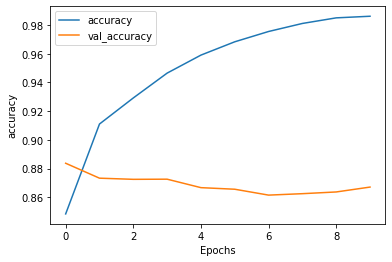

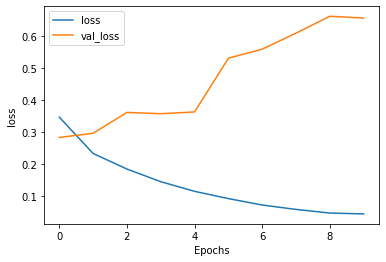

In [244]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history[string])
    plt.plot(history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history.history, 'accuracy')
plot_graphs(history.history, 'loss')

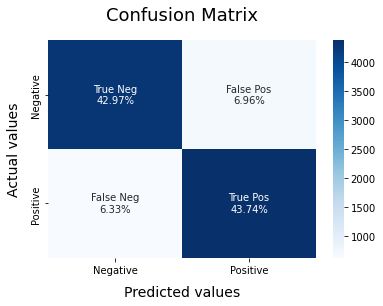

In [245]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Predicting on the Test dataset.
y_pred = model.predict(x_test)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test)

In [246]:
df_test = df[40000:]
df_test['Predicted'] = y_pred
df_test_positive = df_test[df_test['Predicted']==1]
df_test_negative = df_test[df_test['Predicted']==0]

C:\Users\Muhith\AppData\Local\Temp/ipykernel_18504/354951212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted'] = y_pred


In [247]:
df_test_positive

,review,sentiment,Predicted
40002,cover read stuff entir differ type come mind m...,0,1
40005,hickori dickori dock good poirot mysteri confe...,1,1
40006,crazi summer funniest craziest necessarili bes...,1,1
40011,two three favorit stoog short undoubt christin...,1,1
40013,british imperialist like four feather charg li...,1,1
...,...,...,...
49992,john garfield play marin blind grenad fight gu...,1,1
49993,robert colomb two fulltim job known throughout...,0,1
49995,thought right good job creativ origin first ex...,1,1
49997,cathol taught parochi elementari school nun ta...,0,1


In [248]:
df_test_negative

,review,sentiment,Predicted
40000,first want say lean liber polit scale found of...,0,0
40001,excit sitcom hope repres indian candian found ...,0,0
40003,like mani other count appear denni hopper comp...,0,0
40004,v day enjoy first georg jungl good comedi sequ...,0,0
40007,lowbudget schlockmeist herschel gordon lewi re...,0,0
...,...,...,...
49990,lame lame lame minut cringefest minut long set...,0,0
49991,les visiteur first mediev travel actual funni ...,0,0
49994,typic junk comedi almost laugh genuin moment m...,0,0
49996,bad plot bad dialogu bad act idiot direct anno...,0,0


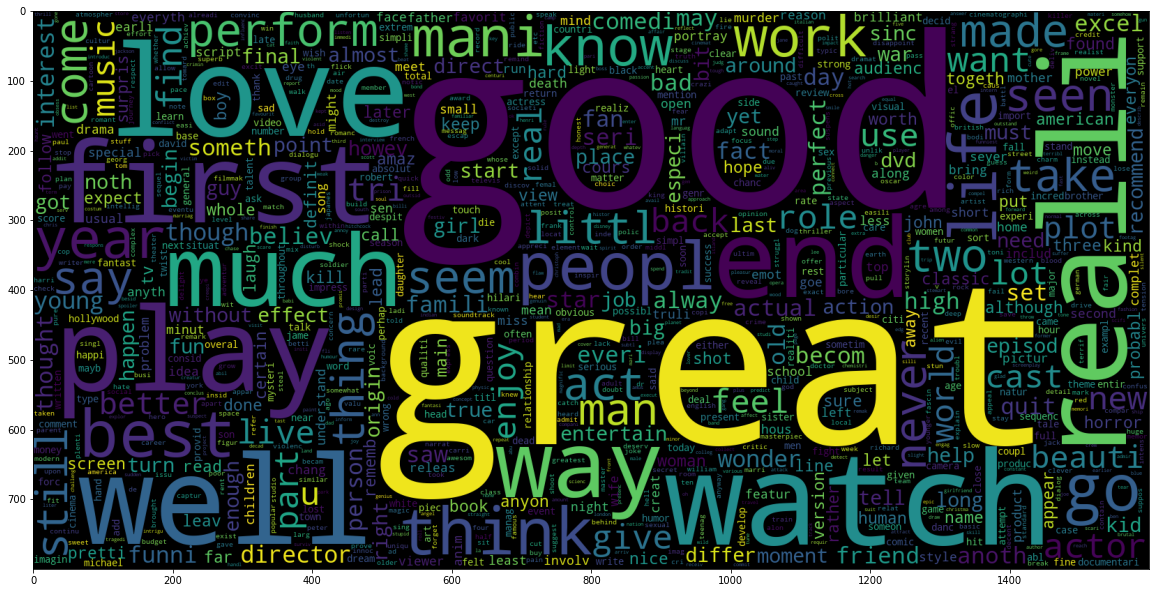

In [249]:
from wordcloud import WordCloud
processedtext = list(df_test_positive['review'])

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(processedtext))
plt.figure(figsize = (20,20))
plt.imshow(wc)

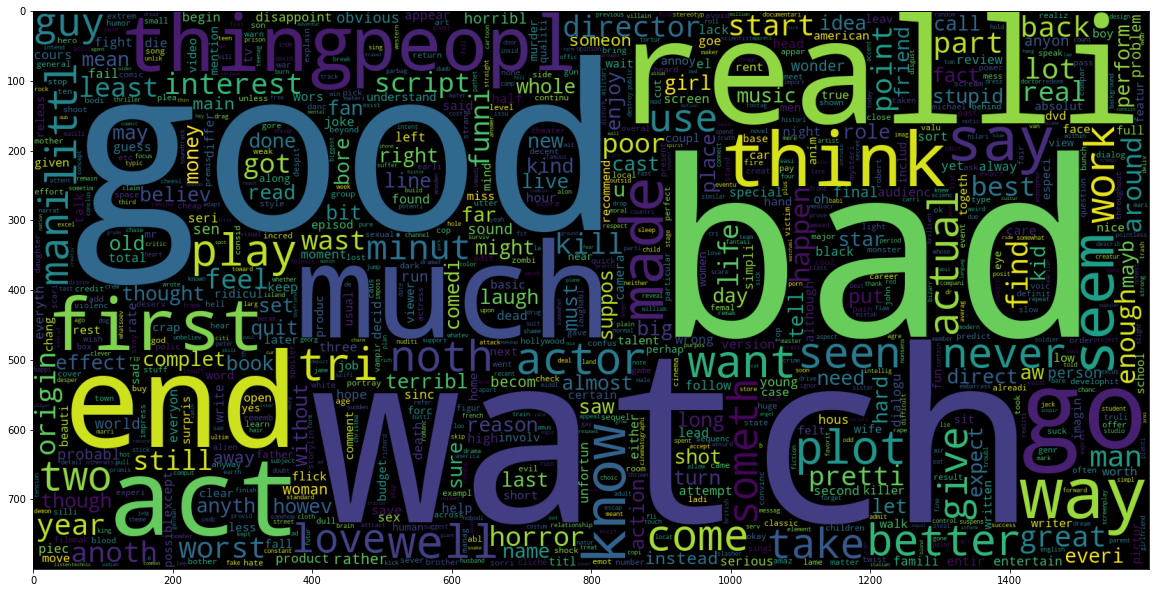

In [250]:
processedtext = list(df_test_negative['review'])

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(processedtext))
plt.figure(figsize = (20,20))
plt.imshow(wc)